In [1]:
import pandas as pd
from sqlalchemy import create_engine

### Extract CSVs into DataFrames

In [2]:
population_file = "../../resources/data/WPP2019_TotalPopulationBySex.csv"
population_df = pd.read_csv(population_file)
population_df.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


In [3]:
happiness_file = "../../resources/data/world-happiness-report-2021.csv"
happiness_df = pd.read_csv(happiness_file)
happiness_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


### Transform premise DataFrame

In [4]:
# Create a filtered dataframe from specific columns
world_happiness_col = ["Country name", "Ladder score"]
world_happiness_transformed= happiness_df[world_happiness_col].copy()

# Rename the column headers
world_happiness_transformed = world_happiness_transformed.rename(columns={"Country name": "Country_name",
                                                          "Ladder score": "Ranking"})

# Clean the data by dropping duplicates and setting the index
world_happiness_transformed.drop_duplicates("Country_name", inplace=True)
#world_happiness_transformed.set_index("Country_name", inplace=True)

#Display the head of the df
world_happiness_transformed.head()

,Country_name,Ranking
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464


In [5]:
#Droping any duplicated data
world_happiness_transformed = world_happiness_transformed.drop_duplicates(subset=['Country_name'])
len_=len(world_happiness_transformed)
print(f"The total countries in this data set is = {len_}")
world_happiness_transformed.head()

The total countries in this data set is = 149


,Country_name,Ranking
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464


In [6]:
#Getting list of columns
list(world_happiness_transformed.columns)

['Country_name', 'Ranking']

In [7]:
#Getting the list of countries in the data set
names = world_happiness_transformed.Country_name
country_names = []
for i in names:
    country_names.append(i)
    
country_names

['Finland',
 'Denmark',
 'Switzerland',
 'Iceland',
 'Netherlands',
 'Norway',
 'Sweden',
 'Luxembourg',
 'New Zealand',
 'Austria',
 'Australia',
 'Israel',
 'Germany',
 'Canada',
 'Ireland',
 'Costa Rica',
 'United Kingdom',
 'Czech Republic',
 'United States',
 'Belgium',
 'France',
 'Bahrain',
 'Malta',
 'Taiwan Province of China',
 'United Arab Emirates',
 'Saudi Arabia',
 'Spain',
 'Italy',
 'Slovenia',
 'Guatemala',
 'Uruguay',
 'Singapore',
 'Kosovo',
 'Slovakia',
 'Brazil',
 'Mexico',
 'Jamaica',
 'Lithuania',
 'Cyprus',
 'Estonia',
 'Panama',
 'Uzbekistan',
 'Chile',
 'Poland',
 'Kazakhstan',
 'Romania',
 'Kuwait',
 'Serbia',
 'El Salvador',
 'Mauritius',
 'Latvia',
 'Colombia',
 'Hungary',
 'Thailand',
 'Nicaragua',
 'Japan',
 'Argentina',
 'Portugal',
 'Honduras',
 'Croatia',
 'Philippines',
 'South Korea',
 'Peru',
 'Bosnia and Herzegovina',
 'Moldova',
 'Ecuador',
 'Kyrgyzstan',
 'Greece',
 'Bolivia',
 'Mongolia',
 'Paraguay',
 'Montenegro',
 'Dominican Republic',
 'North

In [8]:
population_df.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


### Transforming the data from the population df

In [9]:
# Create a filtered dataframe from specific columns
population_col= ["Location", "Time","PopTotal", "PopDensity"]
population_transformed= population_df[population_col].copy()

# Rename the column headers
population_transformed = population_transformed.rename(columns={"Location": "Country_name",
                                                          "Time": "Year",
                                                          "PopTotal":"Total_Population",
                                                          "PopDensity" : "Population_Density"
                                                               })

# Clean the data by dropping duplicates and setting the index
#world_happiness_transformed.drop_duplicates("Country", inplace=True)
#world_happiness_transformed.set_index("Country", inplace=True)

#Display the head of the df
population_transformed.head()

,Country_name,Year,Total_Population,Population_Density
0,Afghanistan,1950,7752.117,11.874
1,Afghanistan,1951,7840.151,12.009
2,Afghanistan,1952,7935.996,12.156
3,Afghanistan,1953,8039.684,12.315
4,Afghanistan,1954,8151.316,12.486


In [10]:
#Filterning the population data by year specifically year 2019
population_2019 = population_transformed.Year == 2019
population_2019.head()

0    False
1    False
2    False
3    False
4    False
Name: Year, dtype: bool

In [11]:
#Getting the dataframe for only 2019 population results
population_2019_df = population_transformed[population_2019]
population_2019_df

,Country_name,Year,Total_Population,Population_Density
69,Afghanistan,2019,38041.757,58.269
953,Africa,2019,1308064.176,44.119
1837,African Group,2019,1306320.572,44.464
1988,African Union,2019,1306903.030,44.085
2139,African Union: Central Africa,2019,154013.705,29.192
...,...,...,...,...
277314,World,2019,7713468.205,59.291
278198,World Bank Regional Groups (developing only),2019,6452517.055,70.258
278349,Yemen,2019,29161.922,55.234
279233,Zambia,2019,17861.034,24.026


In [12]:
#Filtering the data of populaiton df to match the country names in the world_happienss_df
final_pop_df = population_2019_df.loc[population_2019_df['Country_name'].isin(country_names)]
final_pop_df=final_pop_df.reset_index()
final_pop_df = final_pop_df.drop(columns='index')
final_pop_df.head()


,Country_name,Year,Total_Population,Population_Density
0,Afghanistan,2019,38041.757,58.269
1,Albania,2019,2880.913,105.143
2,Algeria,2019,43053.054,18.076
3,Argentina,2019,44780.675,16.363
4,Armenia,2019,2957.728,103.889


In [13]:
#Checking column names for the data frame 
list(final_pop_df.columns)

['Country_name', 'Year', 'Total_Population', 'Population_Density']

In [14]:
#checking the lenght of data set to see if they match
len(final_pop_df)

130

In [15]:
#checking the lenght of data set to see if the match
len(world_happiness_transformed)
#They dont match so world happiness has countrys that are not in the pop df so we need to filter the world happiness df to show only 130 countrys insted of 149

149

In [16]:
#Getting list of country_names in population df
#Getting the list of countries in the data set
pop_names = final_pop_df.Country_name
pop_country_names = []
for i in pop_names:
    pop_country_names.append(i)
    
pop_country_names

['Afghanistan',
 'Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Mo

In [17]:
#Filtering the data of world happiness df to match the country names in the final_pop_df
final_happiness_df = world_happiness_transformed.loc[world_happiness_transformed['Country_name'].isin(pop_country_names)]

#Sorting values by country name, reseting the index of the country to match the other database and dropping extra column after reset index
final_happiness_df = final_happiness_df.sort_values('Country_name')
final_happiness_df = final_happiness_df.reset_index()
final_happiness_df = final_happiness_df.drop(columns='index')
final_happiness_df.head()

#Checking country with highest rank
#final_happiness_df.sort_values('Ranking', ascending = False).head()

,Country_name,Ranking
0,Afghanistan,2.523
1,Albania,5.117
2,Algeria,4.887
3,Argentina,5.929
4,Armenia,5.283


In [18]:
#Getting the column values for final df

list(final_happiness_df.columns)

['Country_name', 'Ranking']

In [19]:
#checking new length of happines data frame to see if it matches the pop data frame 
len_1 = len(final_happiness_df)
len_2 = len(final_pop_df)
print(f"The length of Happieness data set is = {len_1}")
print(f"The length of Population data set is = {len_2}")
#The lenghts match now!

The length of Happieness data set is = 130
The length of Population data set is = 130


In [20]:
#Merging the df to see if it worked using pandas in jupyterlab
merged_df = pd.merge(final_happiness_df , final_pop_df)
#merged_df = merged.drop(columns='index')
merged_df.head()

#Check for column names
#print(list(merged_df.columns))

,Country_name,Ranking,Year,Total_Population,Population_Density
0,Afghanistan,2.523,2019,38041.757,58.269
1,Albania,5.117,2019,2880.913,105.143
2,Algeria,4.887,2019,43053.054,18.076
3,Argentina,5.929,2019,44780.675,16.363
4,Armenia,5.283,2019,2957.728,103.889


## Extra analysis

In [23]:
# Dependencies
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
import pingouin as pg
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import pearsonr
import scipy.stats  as stats

C:\Users\danie\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [27]:
#Creating the correlation table 
no_year_corr = merged_df.drop(columns='Year')
df_corr = no_year_corr.corr()

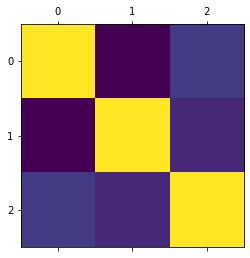

In [28]:
#plotting correaltion table
plt.matshow(df_corr)

In [29]:
#Correlation table
p_correlation_matrix_df = no_year_corr.corr()

p_correlation_matrix_df

,Ranking,Total_Population,Population_Density
Ranking,1.000000,-0.120581,0.073901
Total_Population,-0.120581,1.000000,0.003790
Population_Density,0.073901,0.003790,1.000000


FileNotFoundError: [Errno 2] No such file or directory: '../Images/correlation_matrix.png'

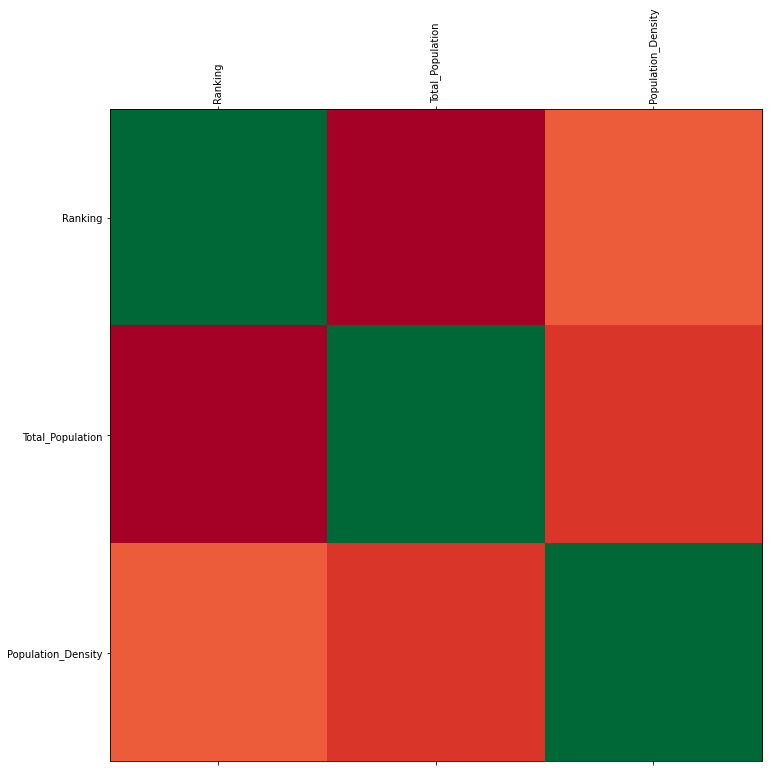

In [30]:
#creating figure for correlation 

labels = [c for c in df_corr.columns]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.matshow(df_corr, cmap=plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels, rotation=90)

#plt.savefig("../Images/correlation_matrix.png", facecolor = "w", bbox_inches= "tight" )
plt.show()

### Create database connection

In [21]:
connection_string = "postgres:postgres@localhost:5432/world_happiness_db"
engine = create_engine(f'postgresql://{connection_string}')

In [22]:
# Confirm tables
engine.table_names()

['world_happiness', 'population']

In [25]:
final_happiness_df = final_happiness_df.set_index('Country_name')

In [30]:
final_happiness_df

,Ranking
Country_name,
Afghanistan,2.523
Albania,5.117
Algeria,4.887
Argentina,5.929
Armenia,5.283
...,...
Uruguay,6.431
Uzbekistan,6.179
Yemen,3.658


In [33]:
#final_happiness_df = final_happiness_df.reset_index()
final_happiness_df.index.name='id'

In [34]:
#Final df
final_happiness_df

,Country_name,Ranking
id,,
0,Afghanistan,2.523
1,Albania,5.117
2,Algeria,4.887
3,Argentina,5.929
4,Armenia,5.283
...,...,...
125,Uruguay,6.431
126,Uzbekistan,6.179
127,Yemen,3.658


In [51]:
final_happiness_df = final_happiness_df.apply.columns.(str.lower)
final_happiness_df

SyntaxError: invalid syntax (<ipython-input-51-07fac6ae6c05>, line 1)

In [35]:
final_pop_df.index.name='id'

In [37]:
final_pop_df = final_pop_df.reset_index()
final_pop_df

,id,Year,Total_Population,Population_Density
0,Afghanistan,2019,38041.757,58.269
1,Albania,2019,2880.913,105.143
2,Algeria,2019,43053.054,18.076
3,Argentina,2019,44780.675,16.363
4,Armenia,2019,2957.728,103.889
...,...,...,...,...
125,Uruguay,2019,3461.731,19.779
126,Uzbekistan,2019,32981.715,77.531
127,Yemen,2019,29161.922,55.234
128,Zambia,2019,17861.034,24.026


In [38]:
final_pop_df = final_pop_df.rename(columns={'id':'Country_name'})
final_pop_df

,Country_name,Year,Total_Population,Population_Density
0,Afghanistan,2019,38041.757,58.269
1,Albania,2019,2880.913,105.143
2,Algeria,2019,43053.054,18.076
3,Argentina,2019,44780.675,16.363
4,Armenia,2019,2957.728,103.889
...,...,...,...,...
125,Uruguay,2019,3461.731,19.779
126,Uzbekistan,2019,32981.715,77.531
127,Yemen,2019,29161.922,55.234
128,Zambia,2019,17861.034,24.026


In [40]:
#final_pop_df.index.name='id'
final_pop_df

,Country_name,Year,Total_Population,Population_Density
id,,,,
0,Afghanistan,2019,38041.757,58.269
1,Albania,2019,2880.913,105.143
2,Algeria,2019,43053.054,18.076
3,Argentina,2019,44780.675,16.363
4,Armenia,2019,2957.728,103.889
...,...,...,...,...
125,Uruguay,2019,3461.731,19.779
126,Uzbekistan,2019,32981.715,77.531
127,Yemen,2019,29161.922,55.234


In [41]:
final_pop_df = final_pop_df.drop(columns='Year')


,Country_name,Total_Population,Population_Density
id,,,
0,Afghanistan,38041.757,58.269
1,Albania,2880.913,105.143
2,Algeria,43053.054,18.076
3,Argentina,44780.675,16.363
4,Armenia,2957.728,103.889
...,...,...,...
125,Uruguay,3461.731,19.779
126,Uzbekistan,32981.715,77.531
127,Yemen,29161.922,55.234


In [49]:
final_pop_df =final_pop_df.rename(columns={'Country_name':'country_name','Total_Population':'total_population','Population_Density':'population_density'})
final_pop_df

,country_name,total_population,population_density
id,,,
0,Afghanistan,38041.757,58.269
1,Albania,2880.913,105.143
2,Algeria,43053.054,18.076
3,Argentina,44780.675,16.363
4,Armenia,2957.728,103.889
...,...,...,...
125,Uruguay,3461.731,19.779
126,Uzbekistan,32981.715,77.531
127,Yemen,29161.922,55.234


### Load DataFrames into database

In [42]:
final_pop_df.to_sql(name='population', con=engine, if_exists='append', index=True)

ProgrammingError: (psycopg2.errors.UndefinedColumn) column "Country_name" of relation "population" does not exist
LINE 1: INSERT INTO population (id, "Country_name", "Total_Populatio...
                                    ^

[SQL: INSERT INTO population (id, "Country_name", "Total_Population", "Population_Density") VALUES (%(id)s, %(Country_name)s, %(Total_Population)s, %(Population_Density)s)]
[parameters: ({'id': 0, 'Country_name': 'Afghanistan', 'Total_Population': 38041.757000000005, 'Population_Density': 58.269}, {'id': 1, 'Country_name': 'Albania', 'Total_Population': 2880.913, 'Population_Density': 105.14299999999999}, {'id': 2, 'Country_name': 'Algeria', 'Total_Population': 43053.054000000004, 'Population_Density': 18.076}, {'id': 3, 'Country_name': 'Argentina', 'Total_Population': 44780.675, 'Population_Density': 16.363}, {'id': 4, 'Country_name': 'Armenia', 'Total_Population': 2957.728, 'Population_Density': 103.889}, {'id': 5, 'Country_name': 'Australia', 'Total_Population': 25203.2, 'Population_Density': 3.281}, {'id': 6, 'Country_name': 'Austria', 'Total_Population': 8955.108, 'Population_Density': 108.667}, {'id': 7, 'Country_name': 'Azerbaijan', 'Total_Population': 10047.719000000001, 'Population_Density': 121.55799999999999}  ... displaying 10 of 130 total bound parameter sets ...  {'id': 128, 'Country_name': 'Zambia', 'Total_Population': 17861.034, 'Population_Density': 24.026}, {'id': 129, 'Country_name': 'Zimbabwe', 'Total_Population': 14645.473, 'Population_Density': 37.858000000000004})]
(Background on this error at: http://sqlalche.me/e/13/f405)

In [9]:
final_happiness_df.to_sql(name='world_happiness', con=engine, if_exists='append', index=True)